# Understanding principal component analysis 

In this post, we'll take a deep dive into PCA, from both a mathematical and implementation perspective.
We'll derive the equation from first the ground up, look at how we can compute it and finally end with what it can be used for.

## Background

## The optimal coding perspective

## The decorrelation perspective

## The axis transformation perspective

## Relationship with eigendecomposition

## Relationship with singular value decomposition

### Example uses using our implementation from scratch

In [24]:
import numpy as np
import matplotlib.pyplot as plt

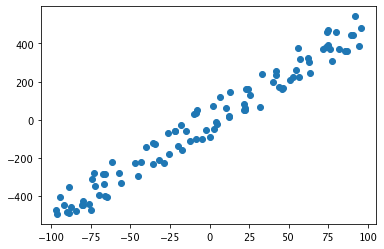

In [128]:
def generate_noisy_line(gradient, N=100)
    N = 100
    X = np.zeros(shape=(N, 2))
    X[:,0] = np.random.uniform(-100, 100, size=N)
    X[:,1] = (x*gradient)+ np.random.uniform(-100, 100, size=N)
    return X
plt.scatter(x, y)

In [150]:
def pca_eig(X):
    _, v = np.linalg.eig(1/(N-1)* (X.T @ X))
    return v

def pca_svd(X):
    _,_,x = np.linalg.svd(X)
    return x

def whiten(X):
    return (X-np.mean(X, axis=0))/np.std(X, axis=0)

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


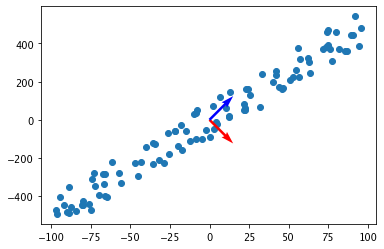

In [151]:
D = pca(X)
plt.scatter(x,y)
print(D)
origin = [0,0]
eig_vec1, eig_vec2 = D[0, :], D[1,:]
plt.quiver(*origin, *eig_vec1, color=['r'], scale=10)
plt.quiver(*origin, *eig_vec2, color=['b'], scale=10)

In [131]:
from sklearn.decomposition import PCA
fitted = PCA().fit(X)

In [132]:
fitted.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

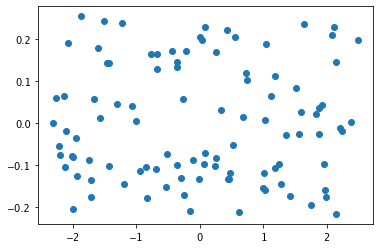

In [142]:
Z = X@D
plt.scatter(Z[:,0], Z[:,1])

In [145]:
_,_,D_prime = np.linalg.svd(X)
print(D_prime)

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]
